# Taller 2: operaciones de transformación del histograma

## Cargue la imagen de trabajo y visualícela.

In [127]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

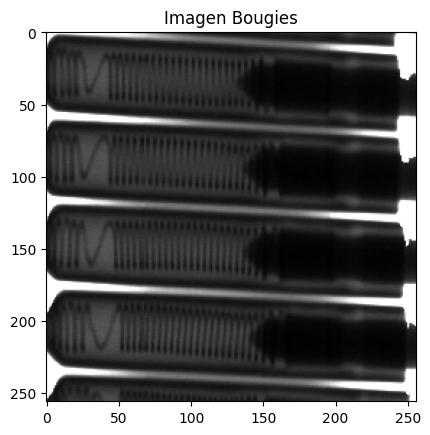

In [128]:
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread(PATH + 'BOUGIES.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Bougies')
plt.show()

## Visualice su histograma.

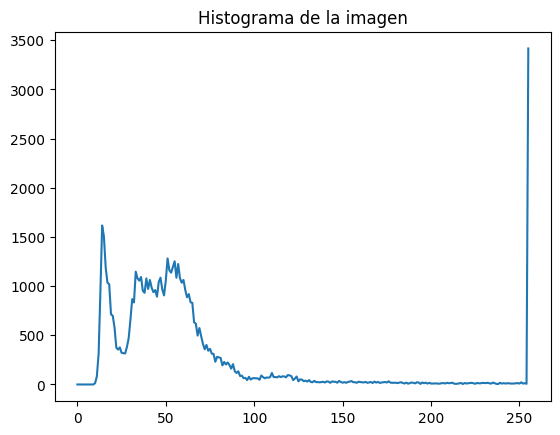

In [129]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la imagen')
plt.show()

## Efectúe una expansión del contraste, visualice la imagen resultado y su histograma. Compare las imágenes (original y después de la expansión), junto con sus histogramas. ¿A qué se debe este resultado?

In [130]:
import numpy as np
from skimage import exposure
rescaled_img = exposure.rescale_intensity(imagen, in_range=(imagen.min(), imagen.max()), out_range=(0, 255))
rescaled_img = rescaled_img.astype(np.uint8)

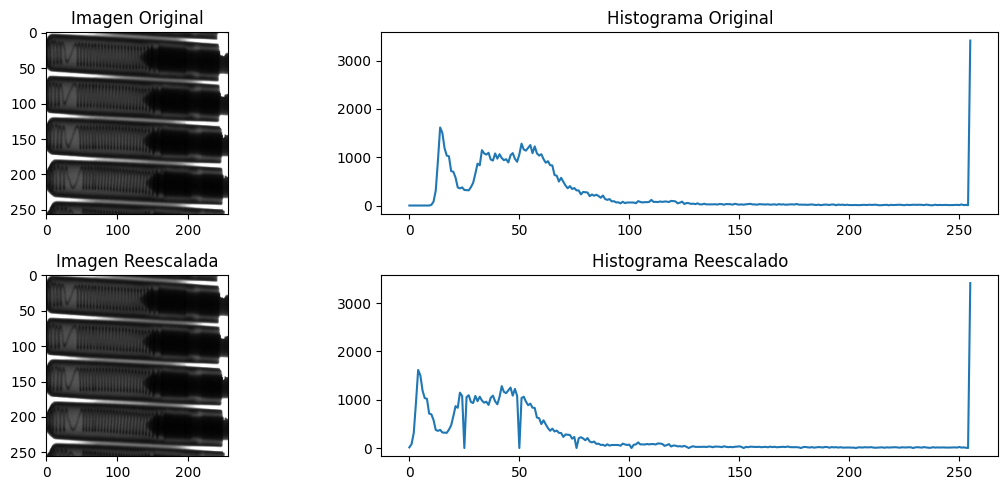

In [131]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_rescaled = cv2.calcHist([rescaled_img], [0], None, [256], [0, 256])

fig, axs = plt.subplots(2, 2, figsize=(12, 5))
axs[0, 0].imshow(imagen, cmap='gray')
axs[0, 0].set_title('Imagen Original')
axs[0, 1].plot(hist)
axs[0, 1].set_title('Histograma Original')
axs[1, 0].imshow(rescaled_img, cmap='gray')
axs[1, 0].set_title('Imagen Reescalada')
axs[1, 1].plot(hist_rescaled)
axs[1, 1].set_title('Histograma Reescalado')
plt.tight_layout()
plt.show()

In [132]:
print(imagen.min(), imagen.max())

10 255


Al reescalar la imagen no notamos cambios significativos ni en el aspecto visual ni en los histogramas de la misma. Esto se debe a que el rango de la imagen empieza desde 10, muy cercano al limite inferior, y termina en 255 que es el límite superior con el que estamos reescalando.

## Sobre la imagen original efectúe ahora una ecualización del histograma, visualice la imagen resultado y su histograma. Compare las imágenes resultado de la expansión (punto anterior) y de la ecualización (resultado actual), junto con sus histogramas. Comente sus observaciones.

In [133]:
imagen_Bougies_equ = cv2.equalizeHist(imagen)

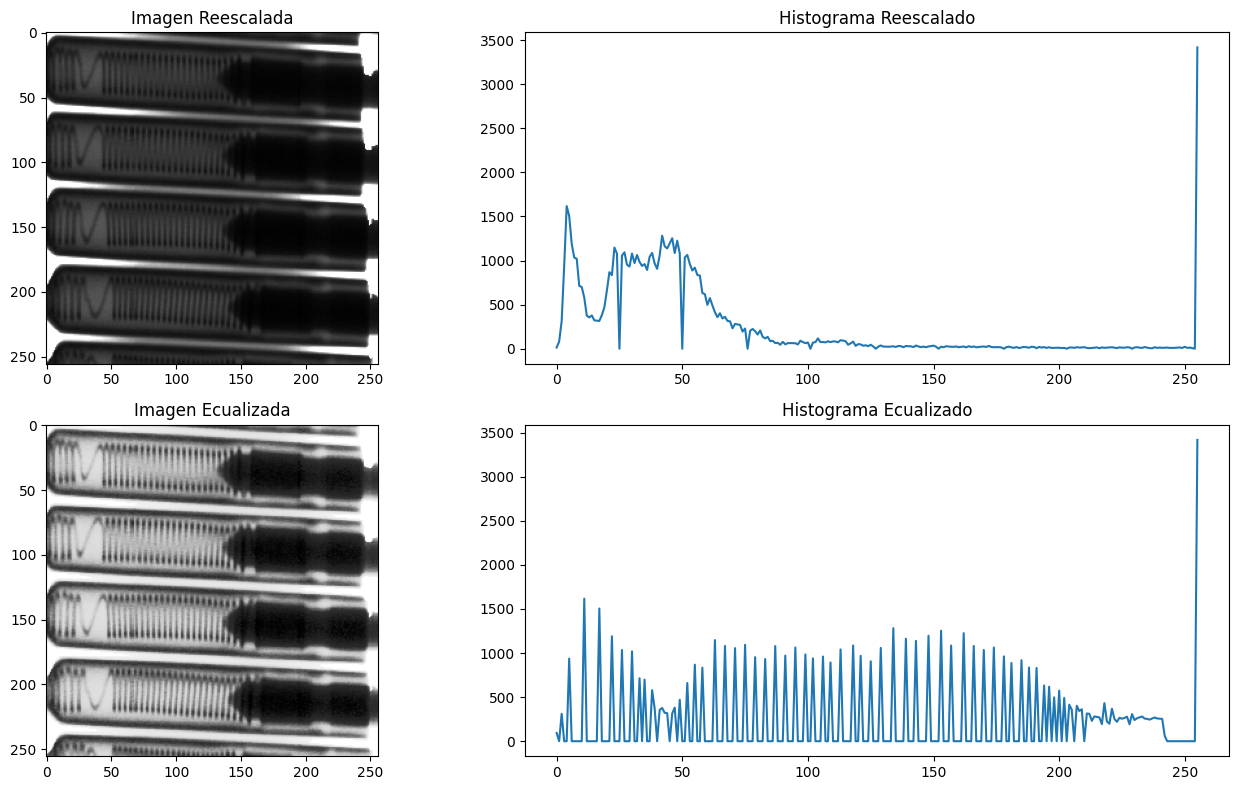

In [134]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs[0, 0].imshow(rescaled_img, cmap='gray')
axs[0, 0].set_title('Imagen Reescalada')
axs[0, 1].plot(hist_rescaled)
axs[0, 1].set_title('Histograma Reescalado')
axs[1, 0].imshow(imagen_Bougies_equ, cmap='gray')
axs[1, 0].set_title('Imagen Ecualizada')
hist_ecua_Bougies = cv2.calcHist([imagen_Bougies_equ], [0], None, [256], [0, 256])
axs[1, 1].plot(hist_ecua_Bougies)
axs[1, 1].set_title('Histograma Ecualizado')
plt.tight_layout()
plt.show()

Luego de ecualizar la imagen, podemos notar un mejor contraste respecto a la imagen reescalada. La imagen cuenta con mayor vivacidad y se nota que hubo una intervención en el histograma al ecualizar, mientras la imagen reescalada es muy similar a la original tanto visualmente como en el histograma.

En el histograma ecualizado, notamos que ahora los niveles de intensidad se distribuyen casi que uniformemente por todo el rango de 0 a 255, con un pico similar al del original en 255. En la imagen original vemos que hay una concentración en valores oscuros y el pico en 255, con un conteo bajo de intensidades en valores entre 120 a 255.

## Sobre la imagen original aplique ahora una transformación logarítmica y multiplique la imagen resultado por un valor constante de 46. ¿Por qué es necesario multiplicar la imagen de salida por un factor? Visualice la imagen resultado y su histograma. ¿Cómo es el histograma resultado?

In [135]:
# Transformación logarítmica: s = c * log(1 + r)
c = 46
print(np.log(1 + imagen.astype(np.float32)))
print('minimo log:', np.log(1 + imagen.astype(np.float32)).min(), 'maximo log:', np.log(1 + imagen.astype(np.float32)).max())
imagen_log = c * np.log(1 + imagen.astype(np.float32))
print(imagen_log)
imagen_log = np.clip(imagen_log, 0, 255).astype(np.uint8)
print(imagen_log)

[[5.5451775 5.5451775 5.5451775 ... 4.691348  4.644391  4.624973 ]
 [5.5451775 5.5451775 5.5451775 ... 5.3471074 5.26269   5.220356 ]
 [5.5451775 5.5451775 5.5451775 ... 5.5451775 5.5451775 5.5451775]
 ...
 [5.5451775 5.3565865 3.7376697 ... 5.5451775 5.5451775 5.5451775]
 [4.8598123 3.8066626 3.637586  ... 5.5451775 5.5451775 5.5451775]
 [3.9512436 3.713572  3.637586  ... 5.5451775 5.5451775 5.5451775]]
minimo log: 2.3978953 maximo log: 5.5451775
[[255.07816 255.07816 255.07816 ... 215.80202 213.64198 212.74875]
 [255.07816 255.07816 255.07816 ... 245.96693 242.08374 240.13638]
 [255.07816 255.07816 255.07816 ... 255.07816 255.07816 255.07816]
 ...
 [255.07816 246.40298 171.9328  ... 255.07816 255.07816 255.07816]
 [223.55136 175.10648 167.32896 ... 255.07816 255.07816 255.07816]
 [181.7572  170.82431 167.32896 ... 255.07816 255.07816 255.07816]]
[[255 255 255 ... 215 213 212]
 [255 255 255 ... 245 242 240]
 [255 255 255 ... 255 255 255]
 ...
 [255 246 171 ... 255 255 255]
 [223 175 1

Para hacer la transformación logarítmica, primero hay que convertir el tipo de la matriz a `float` con un mayor número de bits. Esto va a permitir que la transformación tome valores decimales y no se trunque en enteros. Además, cuando tratamos de hacer la transformación directamente con el tipo `uint8`, obtenemos unos valores de `-inf`, ya que los valores de 255 quedan un poco encima de 255 luego de la transformación. Finalmente, volvemos a truncar los valores para que queden en el rango de 0 a 255 y convertimos de nuevo a tipo entero.

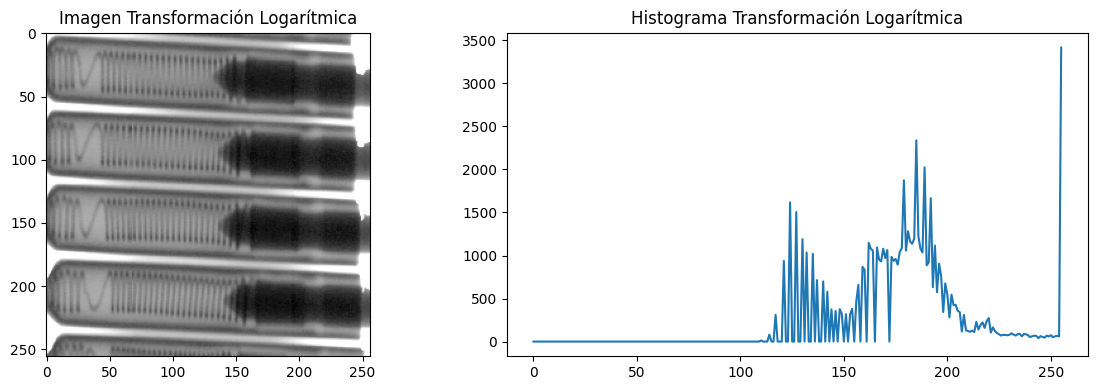

In [136]:
hist_log = cv2.calcHist([imagen_log], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(imagen_log, cmap='gray')
axs[0].set_title('Imagen Transformación Logarítmica')
axs[1].plot(hist_log)
axs[1].set_title('Histograma Transformación Logarítmica')
plt.tight_layout()
plt.show()

In [137]:
print(imagen_log.min(), imagen_log.max())

110 255


Observamos que el histograma desplazó su pico de intesidades oscuras de valores entre 0 a 120 a valores entre 110 y 225. El pico de 255 se mantiene. La imagen ahora se ve más clara y con más contraste respecto a la imagen original. Es necesario multiplicar los valores de salida por un factor porque al aplicar solo el logaritmo el rango de valores quedaría entre 2 y 5. Las contante $c$ controla la escala de salida.

## Sobre la imagen original efectúe ahora una especificación de dos histogramas diferentes de entrada. Visualice la imagen resultado, los histogramas esperados y los histogramas obtenidos. Compare los resultados con los de los puntos anteriores. Comente sus observaciones.

In [138]:
def especificar_histograma(img, hist_deseado):
    """
    Especifica el histograma de una imagen para que se ajuste
    a un histograma deseado.
    
    img: imagen de entrada (uint8, escala de grises)
    hist_deseado: array de 256 valores con la distribución deseada
    """
    hist_norm = hist_deseado / hist_deseado.sum()
    cdf_deseado = np.cumsum(hist_norm)
    N, M = img.shape
    L = 256
    pixel_values = np.interp(np.random.rand(N * M), cdf_deseado, range(L))
    i_to_match = pixel_values.reshape(N, M).astype(np.uint8)
    matched = exposure.match_histograms(img, i_to_match)
    matched = np.clip(matched, 0, 255).astype(np.uint8)
    return matched

Creamos dos distribuciones aleatorias, uno con distribución gausiana y otro con una distribución bimodal con picos alrededor de valores de intensidad de 30 y 200.

In [139]:
x = np.arange(256)
hist_gaussiano = np.exp(-0.5 * ((x - 128) / 50) ** 2)
hist_bimodal = np.exp(-0.5 * ((x - 30) / 30) ** 2) + np.exp(-0.5 * ((x - 200) / 30) ** 2)

img_gauss = especificar_histograma(imagen, hist_gaussiano)
img_bimodal = especificar_histograma(imagen, hist_bimodal)


hist_gauss_obtenido = cv2.calcHist([img_gauss], [0], None, [256], [0, 256])
hist_bimodal_obtenido = cv2.calcHist([img_bimodal], [0], None, [256], [0, 256])

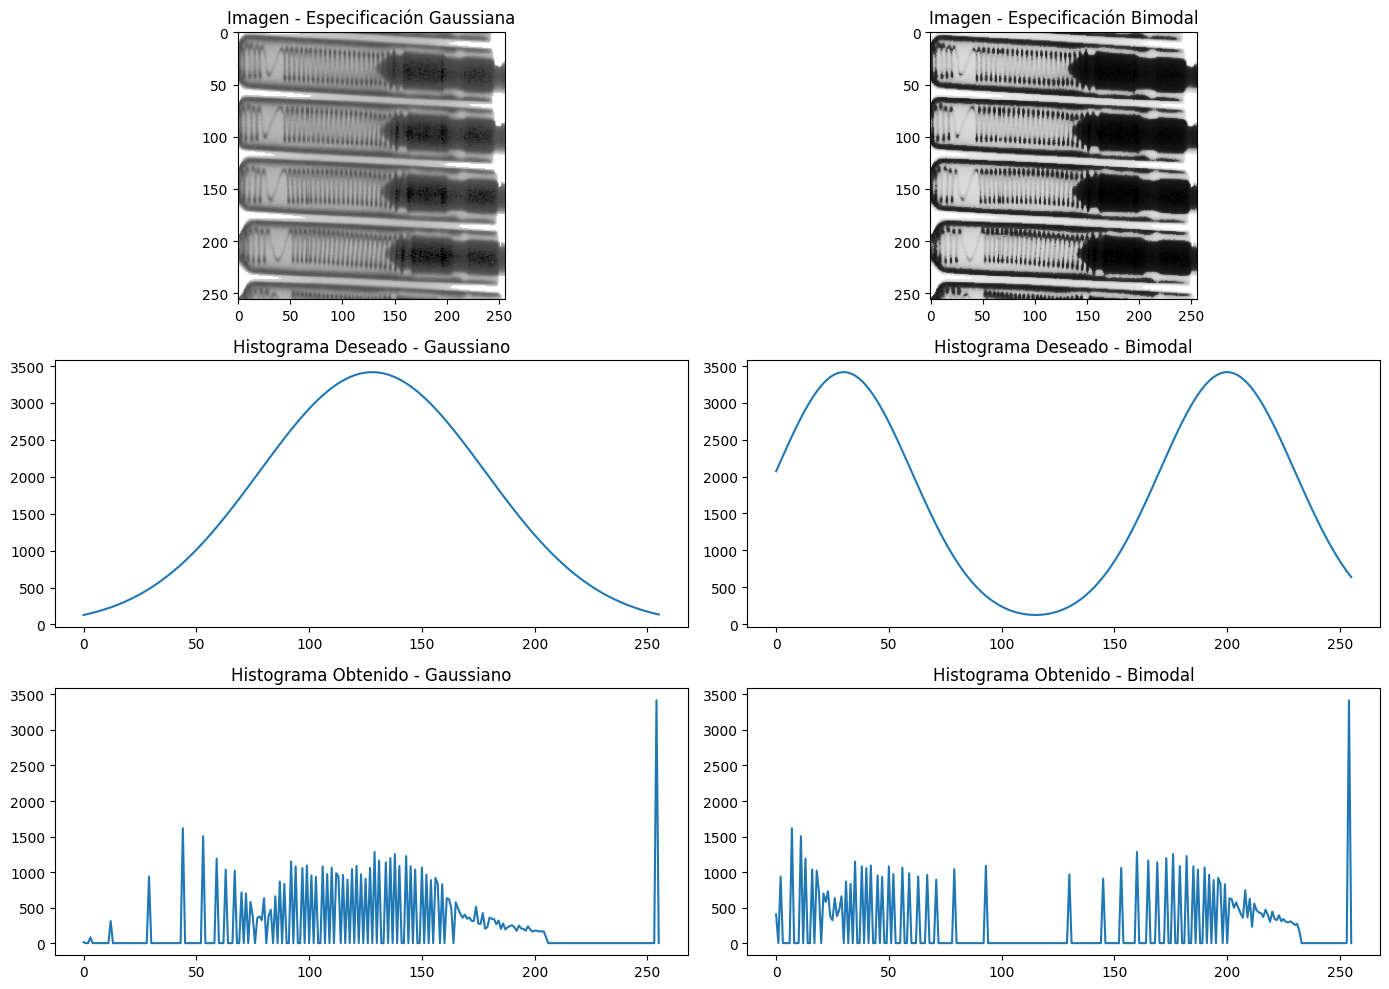

In [140]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

axs[0, 0].imshow(img_gauss, cmap='gray')
axs[0, 0].set_title('Imagen - Especificación Gaussiana')
axs[0, 1].imshow(img_bimodal, cmap='gray')
axs[0, 1].set_title('Imagen - Especificación Bimodal')

axs[1, 0].plot(x, hist_gaussiano / hist_gaussiano.max() * hist_gauss_obtenido.max())
axs[1, 0].set_title('Histograma Deseado - Gaussiano')
axs[1, 1].plot(x, hist_bimodal / hist_bimodal.max() * hist_bimodal_obtenido.max())
axs[1, 1].set_title('Histograma Deseado - Bimodal')

axs[2, 0].plot(hist_gauss_obtenido)
axs[2, 0].set_title('Histograma Obtenido - Gaussiano')
axs[2, 1].plot(hist_bimodal_obtenido)
axs[2, 1].set_title('Histograma Obtenido - Bimodal')

plt.tight_layout()
plt.show()

Los resultados de la especificación son los siguientes:

- **Imagen con especificación Gaussiana**: La imagen se ve con un contraste más suave y natural que la ecualizada. Las velas tienen mejor detalle en los tonos medios, y no se ve tanto contraste como la ecualización. El histograma obtenido sigue la tendencia de la campana gaussiana, con mayor concentración en la media del histograma, excepto por el pico en 255.

- **Imagen con especificación Bimodal**: Las zonas oscuras se oscurecen más y las claras se aclaran, dando un contraste marcado. El histograma obtenido muestra la tendencia bimodal con dos zonas de concentración y el pico de 255 sigue presente.

**Comparación con las transformaciones anteriores**

1. **Reescalado**: No produjo cambios significativos. La especificación sí transforma la imagen de manera notable.
2. **Ecualización**: Distribuye uniformemente las intensidades, logrando buen contraste pero sin control sobre la forma del histograma. La especificación permite elegir la distribución deseada.
3. **Transformación logarítmica**: Expande tonos oscuros y comprime claros de forma fija. Distinto a la especificación.

La especificación ofrece mayor versatilidad, porque permite controlar la distribución final de intensidades según la necesidad. Vale la pena resaltar que la distribución obtenida no es igual a la esperada, ya que presenta saltos entre los valores de la frecuencia debido a la naturaleza discreta de la transformación. Finalmente, en todas las transformaciones vimos la prevalencia del pico en 255.

## Haga una comparación entre los tipos de transformaciones ¿Qué impactos tiene cada una? ¿Cómo  pueden ser usadas en el ámbito de mejoramiento de la calidad de la imagen?

1. **Reescalado**: Estira el rango de intensidades al rango completo [0, 255]. El efecto depende de qué tan comprimido esté el rango original. En nuestro caso, como la imagen ya iba de 10 a 255, el cambio fue mínimo.
Puede ser útil cuando la imagen no aprovecha todo el rango de intensidades disponible, por ejemplo imágenes con bajo contraste.

2. **Ecualización**: edistribuye las intensidades para lograr una distribución aproximadamente uniforme. Mejora el contraste global sin necesidad de definir valores. Puede servir para imágenes oscuras o con poco contraste donde se necesita resaltar detalles de forma rápida.

3. **Transformación logarítmica**: Expande los valores oscuros y comprime los claros. La constante $c$ controla la escala de la salida. Útil para imágenes donde los detalles se concentran en las intensidades bajas.

4. **Especificación de histograma**: Permite definir la distribución de salida deseada. Es la más flexible de las cuatro, ya que el usuario controla la forma del histograma resultado. Útil cuando se necesita un contraste específico o cuando se quiere hacer coincidir el aspecto visual de dos imágenes distintas.